In [102]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from sklearn import datasets

Para este ejemplo vamos a utilizar el [Wisconsin Breast Cancer Dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)). Es un dataset de imagenes de celulas obtenidas de analisis de personas que sufren un posible cancer de mama.

Las imagenes tienen el siguiente aspecto:

In [103]:
from IPython.display import Image

Image("breast_cancer.jpeg")

In [104]:
cancer_datos = datasets.load_breast_cancer()
cancer_datos.keys()
#cancer_datos

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [105]:
print(cancer_datos["DESCR"])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [106]:
cancer_datos["target"][:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [107]:
cancer_datos.target_names

array(['malignant', 'benign'], dtype='<U9')

In [108]:
cancer_datos["feature_names"]

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [109]:
cancer_df = pd.DataFrame(cancer_datos["data"],
                           columns=cancer_datos["feature_names"]
                          )

cancer_df["objetivo"] = cancer_datos.target
cancer_df

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                   0.07871  ...          17.33           184.60      2019.0   
1                   0.05667  ...          23.41           158.80      1956.0   
2                   0.05999  ...          25.53           152.50      1709.0   
3                   0.09744  ...          26.50            98.87       567.7   
4                   0.05883  ...          16.67           152.20      1575.0   
..                      ...  ...            ...              ...         ...   
564                 0.05623  ...          26.40           166.10      2027.0   
565                 0.05533  ...          38.25           155.00      1731.0   
566                 0.05648  ...          34.12           126.70      1124.0   
567                 0.07016  ...          39.42           184.60      1821.0   
568                 0.05884  ...          30.37            59.16       268.6   

     worst smoothness  worst compactness  worst concavity  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     worst concave points  worst symmetry  worst fractal dimension  objetivo  
0                  0.2654          0.4601                  0.11890         0  
1                  0.1860          0.2750                  0.08902         0  
2                  0.2430          0.3613                  0.08758         0  
3                  0.2575          0.6638                  0.17300         0  
4                  0.1625          0.2364             

El dataset contiene los valores medios de ciertos parametros del núcleo de las celulas mostradas en las imágenes, así como dichos valores para la celula con características más preocupantes

In [110]:
cancer_df.shape

(569, 31)

In [111]:
#mostrar las 10 primeras filas
cancer_df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  objetivo  
0          0.4601                  0.11890         0  
1          0.2750                  0.08902         0  
2          0.3613                  0.08758         0  
3          0.6638                  0.17300         0  
4          0.2364                  0.07678         0  

[5 rows x 31 columns]

In [112]:
cancer_df.objetivo.value_counts(True)

1    0.627417
0    0.372583
Name: objetivo, dtype: float64

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [114]:
train_df, test_df = train_test_split(cancer_df, test_size=0.4)

variables_entrenamiento = cancer_datos["feature_names"]
variable_objetivo = "objetivo"

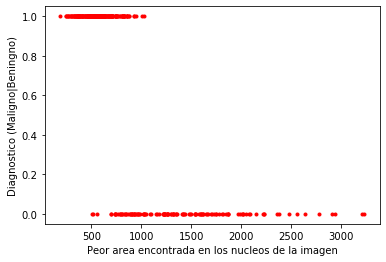

In [115]:
columna_entrenamiento = "worst area"

plt.plot(train_df[columna_entrenamiento], train_df.objetivo, '.r')
plt.xlabel("Peor area encontrada en los nucleos de la imagen")
plt.ylabel("Diagnostico (Maligno|Beningno)");

In [116]:
#elegir un modelo
modelo_ols = LinearRegression()

#entrenar/Obtener parametros para predecir "worst area" contra "objetivo"
modelo_ols.fit(train_df[[columna_entrenamiento]],
               train_df[variable_objetivo])

#Predicciones
predicciones = modelo_ols.predict(test_df[[columna_entrenamiento]])


predicciones[:10]

array([ 0.88521053,  0.8660306 ,  0.98711602, -1.54657205,  0.34752672,
        0.9162084 ,  0.64065028,  0.76283354,  1.00558558,  0.81895259])

In [117]:
plt.plot(test_df[columna_entrenamiento], test_df.objetivo, '.r') #rojo
plt.plot(test_df[columna_entrenamiento], predicciones, '.b')     #azul
plt.xlabel("Peor area encontrada en los nucleos de la imagen")
plt.ylabel("Diagnostico (Maligno|Beningno)")

Text(0, 0.5, 'Diagnostico (Maligno|Beningno)')

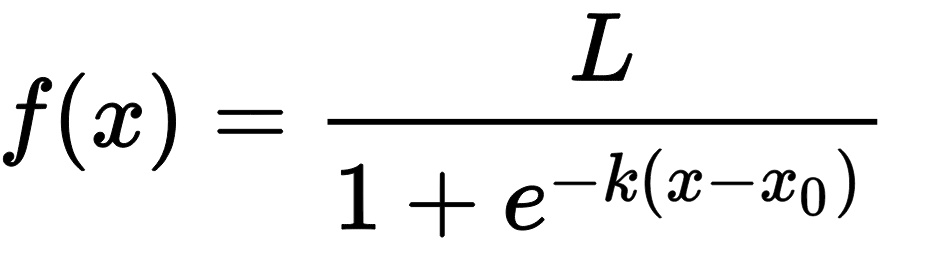

In [118]:
Image("funcion_logistica.png")

In [119]:
#funcion en python de la formula matematica anterior
#depende de x
def funcion_logistica(x, L=1, k=1, x0=0):
    return L / (1 + np.exp(-k*(x-x0)))




In [120]:
predicciones_probabilidades = list(map(funcion_logistica, predicciones))
predicciones_probabilidades

[0.7079008063619648,
 0.7039190780207156,
 0.728517905133859,
 0.175581922550165,
 0.58601768571221,
 0.7142689109400581,
 0.6549004436207498,
 0.681968609544195,
 0.7321553513615184,
 0.6940139593920367,
 0.5321068327585354,
 0.6925033569000565,
 0.6960671667323317,
 0.6690888059724991,
 0.7147694810133859,
 0.5678932987466963,
 0.6983983248268064,
 0.7095006342428098,
 0.6633014316422764,
 0.6286454674572217,
 0.6976768885927227,
 0.7041478355412695,
 0.6772581227362209,
 0.660816266749648,
 0.6628397536525981,
 0.7092077200424051,
 0.6746553963780715,
 0.7191986363289525,
 0.6947813974313329,
 0.6607004604033503,
 0.7208389724871705,
 0.6389570953233279,
 0.7148616337890628,
 0.6886949525679399,
 0.5894601388194446,
 0.4880782414176176,
 0.47292644861793653,
 0.590553646997696,
 0.7045916015461212,
 0.6678579956092863,
 0.5343571053281789,
 0.6810294462147155,
 0.48727149600767455,
 0.4138704349599025,
 0.6935063106994906,
 0.6748679820149651,
 0.4756637905138771,
 0.573115070856087

Text(0, 0.5, 'Diagnostico (Maligno|Beningno)')

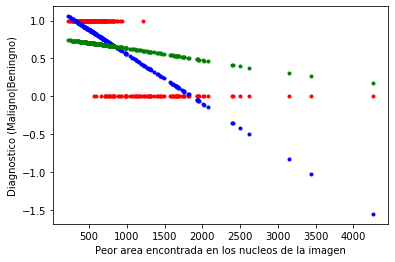

In [121]:
plt.plot(test_df[columna_entrenamiento], test_df.objetivo, '.r')           #red
plt.plot(test_df[columna_entrenamiento], predicciones, '.b')               #blue
plt.plot(test_df[columna_entrenamiento], predicciones_probabilidades,'.g') #green

plt.xlabel("Peor area encontrada en los nucleos de la imagen")
plt.ylabel("Diagnostico (Maligno|Beningno)")

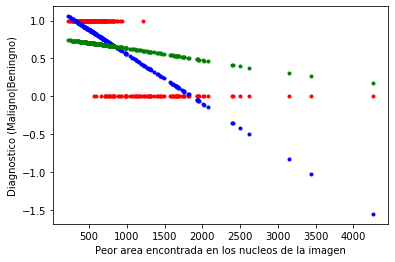

In [122]:
from functools import partial

funcion_logit_k5 = partial(funcion_logistica, k=1)

predicciones_probabilidades = list(map(funcion_logit_k5, predicciones))

plt.plot(test_df[columna_entrenamiento], test_df.objetivo, '.r')
plt.plot(test_df[columna_entrenamiento], predicciones, '.b')
plt.plot(test_df[columna_entrenamiento], predicciones_probabilidades,'.g')

plt.xlabel("Peor area encontrada en los nucleos de la imagen")
plt.ylabel("Diagnostico (Maligno|Beningno)");

In [123]:
from sklearn.linear_model import LogisticRegression

In [124]:
LogisticRegression??

In [125]:
# x etiquetas de entrenamiento
# y etiquetas
X = cancer_df[variables_entrenamiento]
y = cancer_df[variable_objetivo]
# Usar el 20% para pruebas
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [126]:
clf = LogisticRegression() # modelo de regresion logistica
clf.fit(X_train, y_train) # entrenar/preparar/obtener parametros para predecir
predicciones = clf.predict(X_test) # Predecir usando el 20% de la data

# Mostrar los 10 primeros
predicciones[:10]

c:\python37\envml\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0, 0, 1, 0, 1, 1, 1, 1, 0, 1])

In [131]:
# Predicciones probables
predicciones_probabilidades = clf.predict_proba(X_test)
predicciones_probabilidades#[:10]

array([[1.00000000e+00, 3.63939197e-15],
       [5.97877110e-01, 4.02122890e-01],
       [7.79516259e-03, 9.92204837e-01],
       [6.61978768e-01, 3.38021232e-01],
       [2.50353489e-03, 9.97496465e-01],
       [4.67009233e-02, 9.53299077e-01],
       [4.89047724e-03, 9.95109523e-01],
       [2.45935564e-03, 9.97540644e-01],
       [1.00000000e+00, 2.72711447e-11],
       [9.42698831e-02, 9.05730117e-01],
       [9.88632347e-01, 1.13676528e-02],
       [1.42735978e-03, 9.98572640e-01],
       [3.14757235e-04, 9.99685243e-01],
       [2.97110270e-03, 9.97028897e-01],
       [1.43165455e-03, 9.98568345e-01],
       [9.99999222e-01, 7.78152224e-07],
       [9.99981614e-01, 1.83859999e-05],
       [2.59763015e-02, 9.74023699e-01],
       [5.08602996e-02, 9.49139700e-01],
       [3.82527762e-03, 9.96174722e-01],
       [5.06688447e-02, 9.49331155e-01],
       [4.93500545e-03, 9.95064995e-01],
       [9.92189920e-01, 7.81008014e-03],
       [9.99995265e-01, 4.73453197e-06],
       [1.000000

In [134]:
plt.hist(predicciones_probabilidades);

In [135]:
probs_df = pd.DataFrame(predicciones_probabilidades)

In [139]:
X = X_test.reset_index().copy()
X["objetivo"] = y_test.tolist()
X["prediccion"] = predicciones
X = pd.concat([X, probs_df], axis=1)
X[["objetivo","index", "prediccion", 0, 1]].head(20)

objetivo  index  prediccion         0             1
0          0      0           0  1.000000  3.639392e-15
1          0    277           0  0.597877  4.021229e-01
2          1    217           1  0.007795  9.922048e-01
3          0    213           0  0.661979  3.380212e-01
4          1    222           1  0.002504  9.974965e-01
5          1    396           1  0.046701  9.532991e-01
6          1    515           1  0.004890  9.951095e-01
7          1    381           1  0.002459  9.975406e-01
8          0    181           0  1.000000  2.727114e-11
9          1    248           1  0.094270  9.057301e-01
10         0     57           0  0.988632  1.136765e-02
11         1    273           1  0.001427  9.985726e-01
12         1    319           1  0.000315  9.996852e-01
13         1     46           1  0.002971  9.970289e-01
14         1    349           1  0.001432  9.985683e-01
15         0    203           0  0.999999  7.781522e-07
16         0    516           0  0.999982  1.838600e-05
17         1     19           1  0.025976  9.740237e-01
18         1    331           1  0.050860  9.491397e-01
19         1    334           1  0.003825  9.961747e-01